# Q. 
Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)df

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples


In [2]:
data=pd.read_csv("wine.csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
data.Type.unique()

array([1, 2, 3], dtype=int64)

In [5]:
data.Type.value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [6]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


# EDA

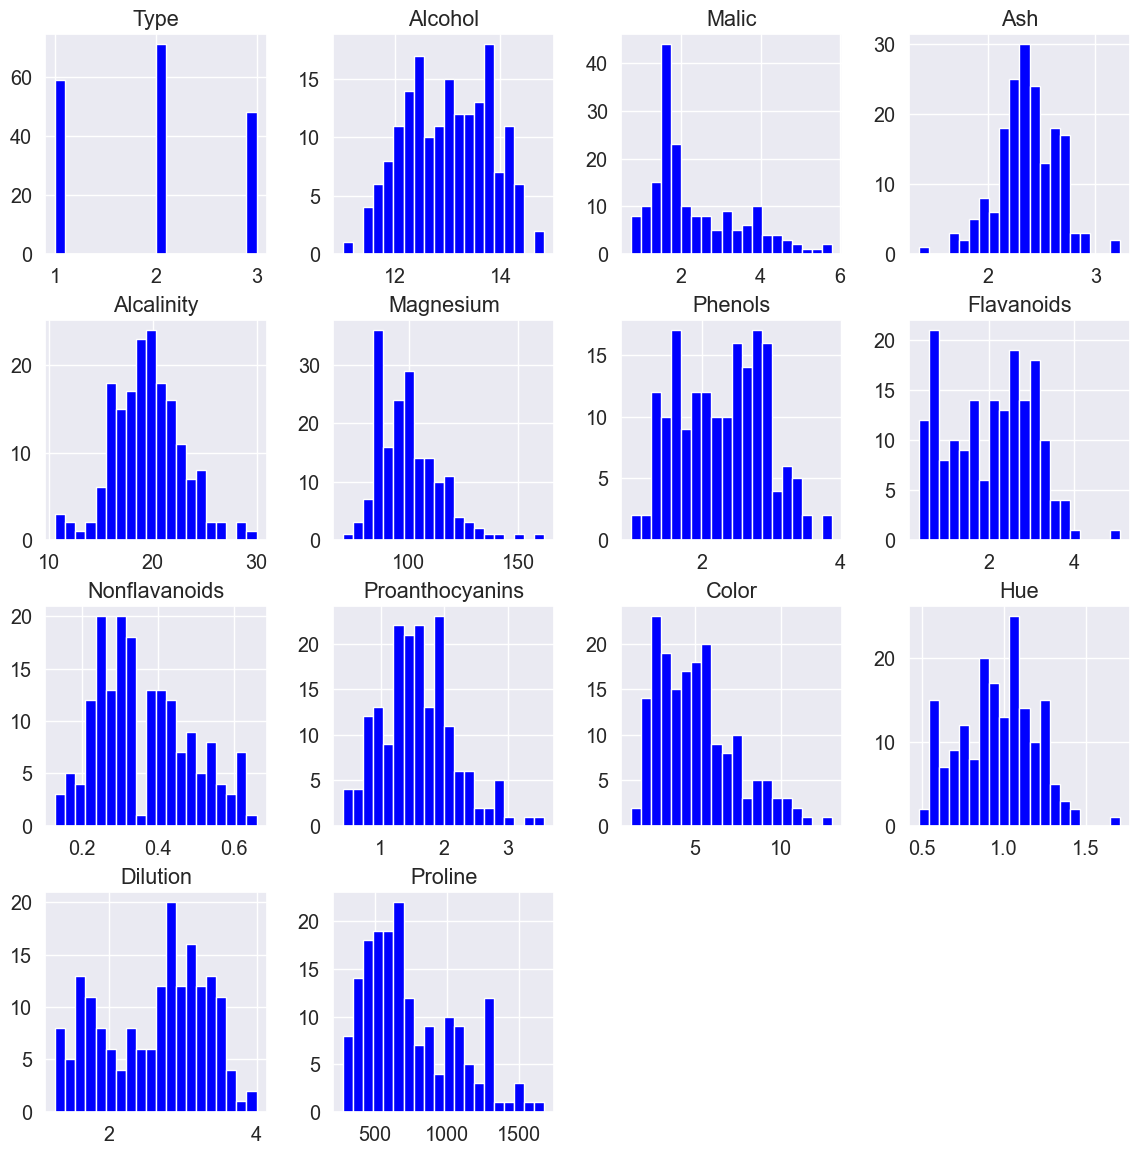

In [58]:
sns.set(style= 'dark', font_scale= 1.3, rc= {'figure.figsize':(14,14)})
ax = data.hist(bins= 20, color= 'blue')

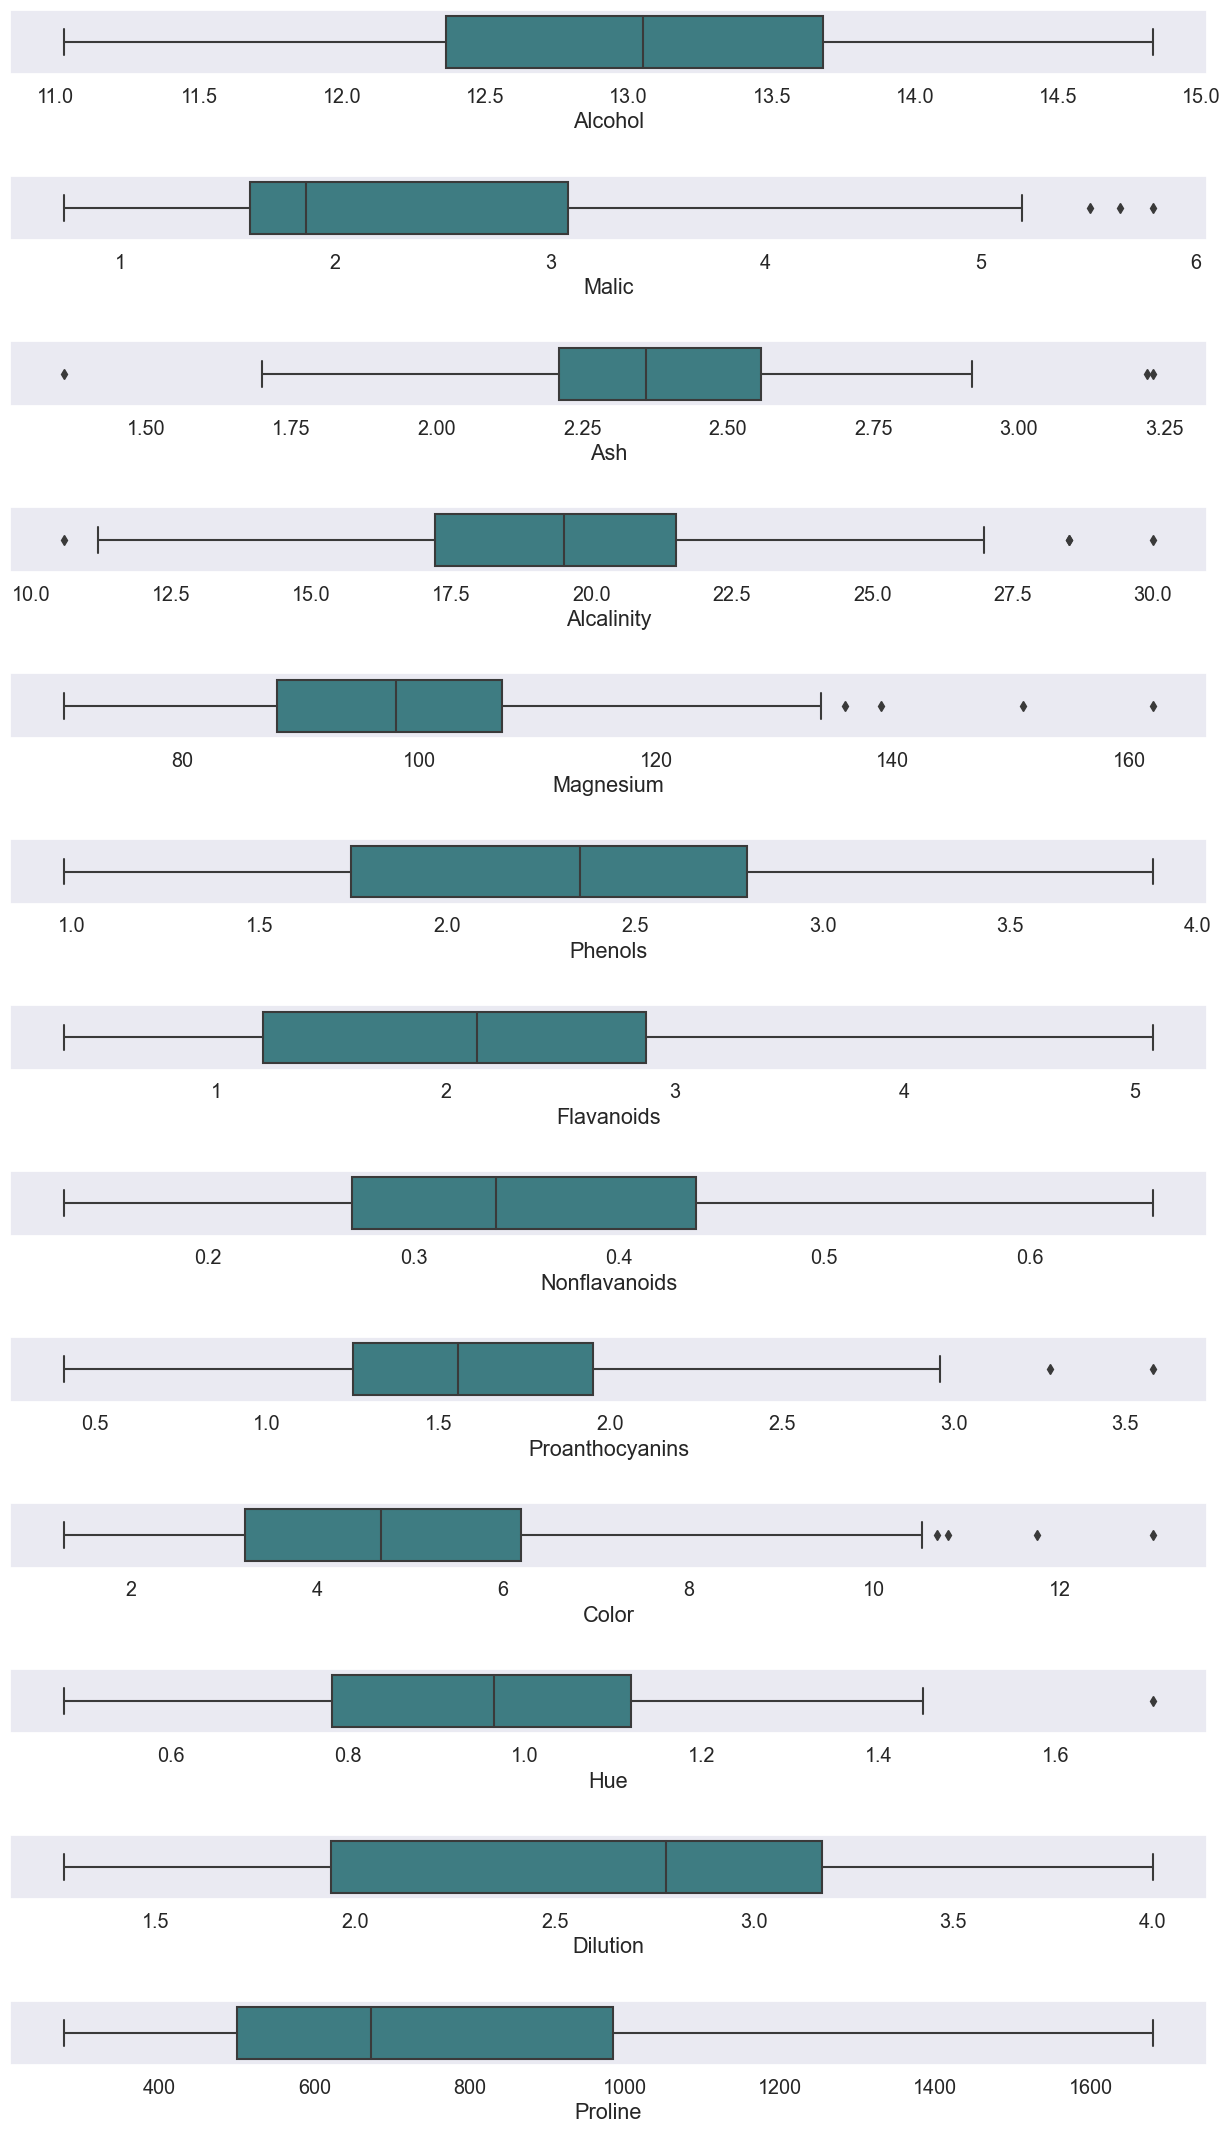

In [60]:
# Box plot for every feature in the same graph

outlier = data.copy()
fig, axes=plt.subplots(13,1, figsize=(13,22),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=outlier,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=outlier,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=outlier,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=outlier,palette='crest',ax=axes[12])
plt.tight_layout(pad=2.0)

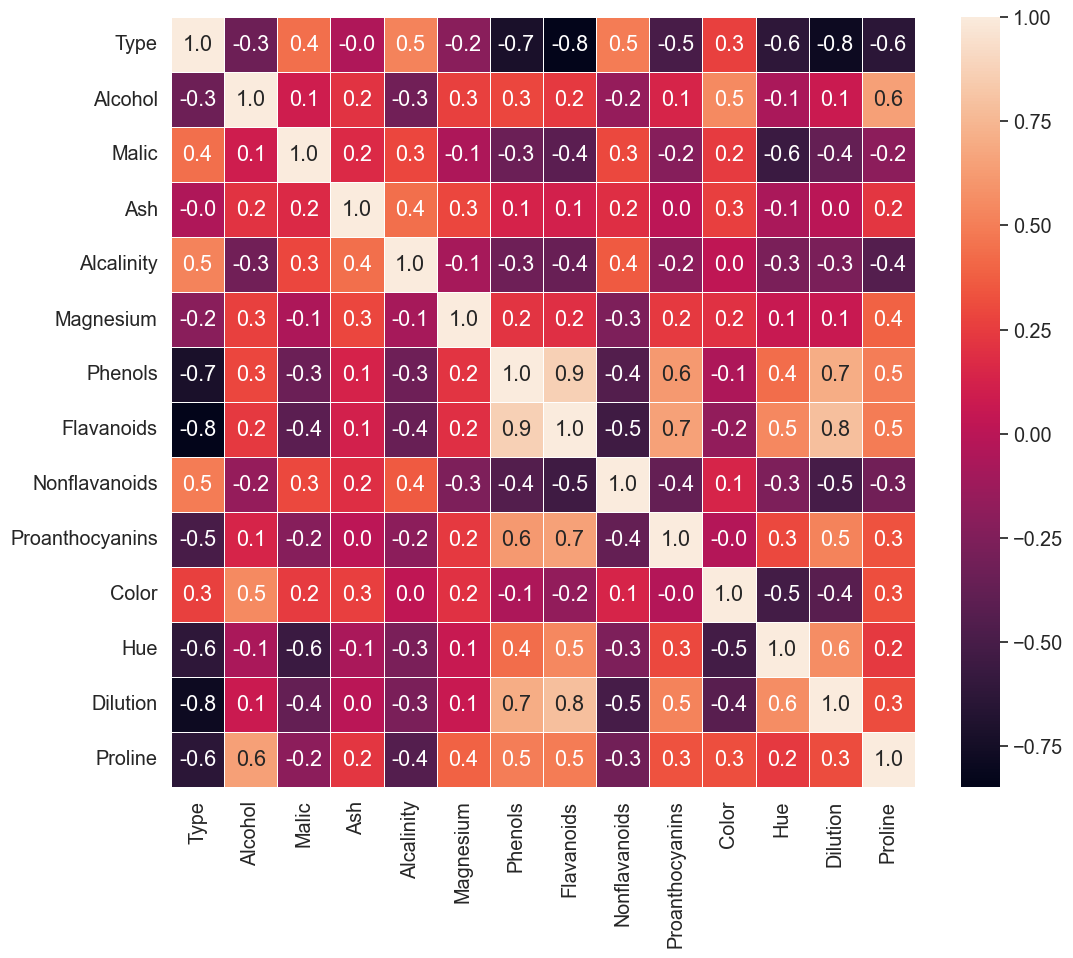

In [61]:
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

In [9]:
features=data.iloc[:,1:14]
features

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# 
Using MinMaxScaler

In [10]:
scaled_feature=(features-features.min(axis=0))/(features.max(axis=0)-features.min(axis=0))

In [11]:
scaled_feature

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


# PCA

In [12]:
pca=PCA()
new_features=pca.fit_transform(scaled_feature)

In [13]:
new_features

array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.04971144,
        -0.02001158, -0.00872296],
       [-0.4849768 , -0.00882289, -0.28048205, ...,  0.07415784,
        -0.05083753, -0.00524944],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.0121311 ,
        -0.10418449, -0.02316441],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ...,  0.13116697,
         0.11160576,  0.0389133 ],
       [ 0.5729911 , -0.42551609, -0.09453672, ...,  0.03027458,
         0.05732893,  0.01103053],
       [ 0.701764  , -0.51350498,  0.29390996, ..., -0.02784028,
         0.01873501, -0.06648261]])

In [14]:
np.round(pca.explained_variance_ratio_,2)

array([0.41, 0.19, 0.09, 0.07, 0.06, 0.05, 0.04, 0.02, 0.02, 0.02, 0.01,
       0.01, 0.01])

# 
Here we can see our 1st two features contains most of the data.

So these 2 features are important features

In [15]:
x_train,x_test,y_train,y_test=train_test_split(new_features[:,:1],data["Type"],test_size=0.2,random_state=10)

In [16]:
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.71      1.00      0.83        10
           2       1.00      0.56      0.71        18
           3       0.67      1.00      0.80         8

    accuracy                           0.78        36
   macro avg       0.79      0.85      0.78        36
weighted avg       0.85      0.78      0.77        36



# Ploting

In [17]:
encoded_data=LabelEncoder().fit_transform(data["Type"])

In [18]:
encoded_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

# 
Doing the plot using 1st two features

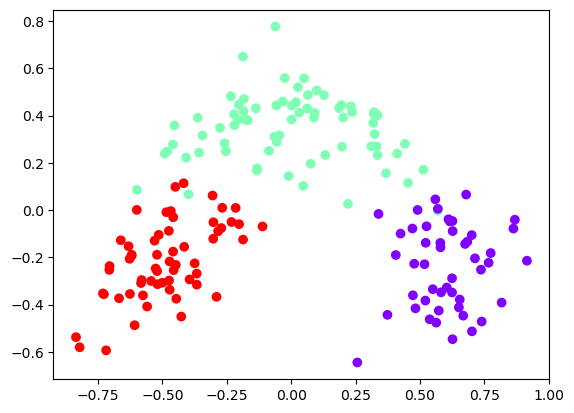

In [33]:
plt.scatter(new_features[:,0],new_features[:,1],c=encoded_data,cmap=plt.cm.rainbow_r)

#
Doing the plot using other features

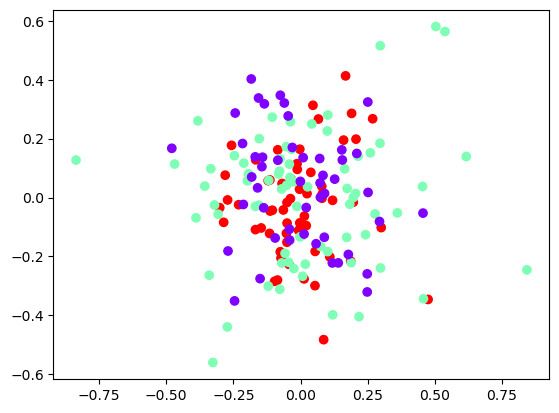

In [29]:
plt.scatter(new_features[:,2],new_features[:,3],c=encoded_data,cmap=plt.cm.rainbow_r)

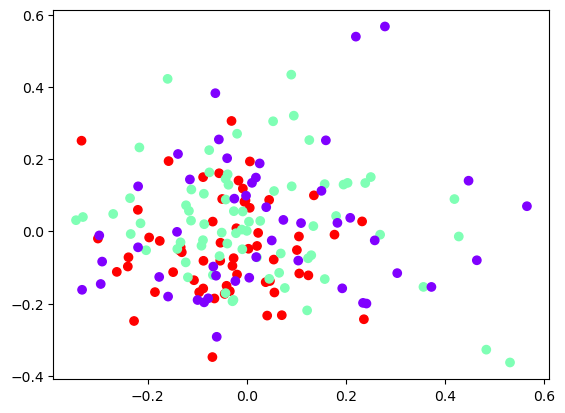

In [34]:
plt.scatter(new_features[:,4],new_features[:,5],c=encoded_data,cmap=plt.cm.rainbow_r)

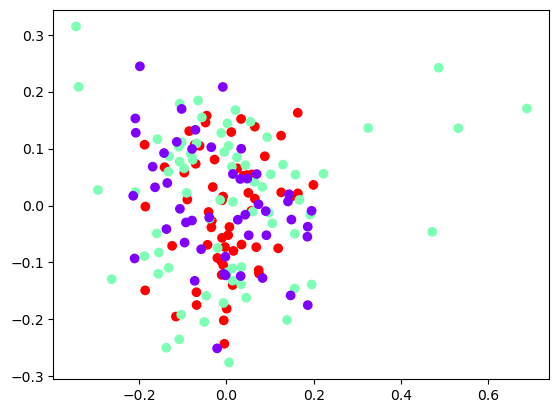

In [35]:
plt.scatter(new_features[:,6],new_features[:,7],c=encoded_data,cmap=plt.cm.rainbow_r)

# 
As we can see from above plotting except the 1st two features other features don't have much informations.

So we can go through using 1st two features.

In [30]:
pd.DataFrame(new_features).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000e+00,6.515988e-16,2.626884e-16,1.656405e-16,-3.636539e-16,-2.370539e-16,1.306840e-17,2.388315e-16,1.402348e-16,-1.856757e-16,-3.178088e-16,2.027939e-16,5.919255e-17
1,6.515988e-16,1.000000e+00,-5.011874e-17,-1.100708e-16,2.170423e-16,8.106760e-17,1.471330e-16,-5.991445e-16,-2.386821e-16,1.105186e-16,3.438474e-17,8.861221e-18,-5.352918e-17
2,2.626884e-16,-5.011874e-17,1.000000e+00,-1.101395e-16,5.494108e-16,5.976126e-17,1.257052e-16,3.867864e-16,6.332648e-17,-6.613492e-18,-1.514378e-16,1.154144e-17,-1.785930e-17
3,1.656405e-16,-1.100708e-16,-1.101395e-16,1.000000e+00,8.820290e-18,-4.252508e-16,-2.236735e-16,-3.732476e-17,-9.404293e-17,-7.988502e-18,5.438831e-17,-7.191796e-17,-6.010777e-17
4,-3.636539e-16,2.170423e-16,5.494108e-16,8.820290e-18,1.000000e+00,-1.223212e-16,1.945926e-16,1.177048e-16,-1.153953e-16,1.062528e-16,-2.429706e-16,1.441311e-16,-6.389799e-19
5,-2.370539e-16,8.106760e-17,5.976126e-17,-4.252508e-16,-1.223212e-16,1.000000e+00,-2.643983e-16,1.245845e-16,-2.525244e-16,-9.441723e-17,1.527182e-16,2.216502e-17,-8.101226e-17
6,1.306840e-17,1.471330e-16,1.257052e-16,-2.236735e-16,1.945926e-16,-2.643983e-16,1.000000e+00,2.876885e-16,1.508626e-17,-2.056684e-16,2.544822e-16,-3.335316e-16,7.665132e-17
7,2.388315e-16,-5.991445e-16,3.867864e-16,-3.732476e-17,1.177048e-16,1.245845e-16,2.876885e-16,1.000000e+00,1.403211e-16,-5.454925e-18,-2.427292e-16,-3.072170e-16,-4.079260e-17
8,1.402348e-16,-2.386821e-16,6.332648e-17,-9.404293e-17,-1.153953e-16,-2.525244e-16,1.508626e-17,1.403211e-16,1.000000e+00,-2.670569e-16,-2.902379e-16,-1.866068e-17,-9.329056e-17
9,-1.856757e-16,1.105186e-16,-6.613492e-18,-7.988502e-18,1.062528e-16,-9.441723e-17,-2.056684e-16,-5.454925e-18,-2.670569e-16,1.000000e+00,7.576570e-17,1.293594e-16,-9.578378e-17


# K Means Clustering

In [46]:
model=KMeans(n_clusters=3)
new_model=model.fit_predict(new_features)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [47]:
new_model

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

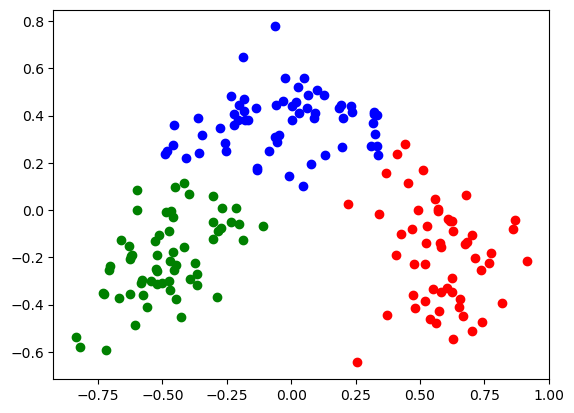

In [48]:
plt.scatter(new_features[new_model==0,0],new_features[new_model==0,1],color='blue')
plt.scatter(new_features[new_model==1,0],new_features[new_model==1,1],color='red')
plt.scatter(new_features[new_model==2,0],new_features[new_model==2,1],color='green')

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

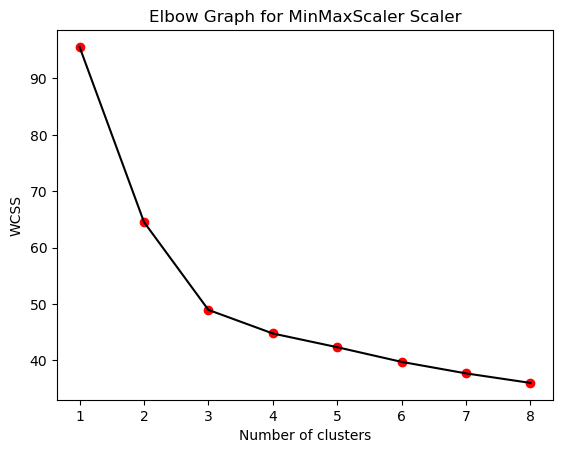

In [51]:
wcss=[]
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(new_features)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Hierarchical Clustering

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [54]:
model=AgglomerativeClustering(n_clusters=3,affinity="l2",linkage="complete")
pred=model.fit_predict(new_features)
pred

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [55]:
xdist=pdist(new_features,metric="euclidean")

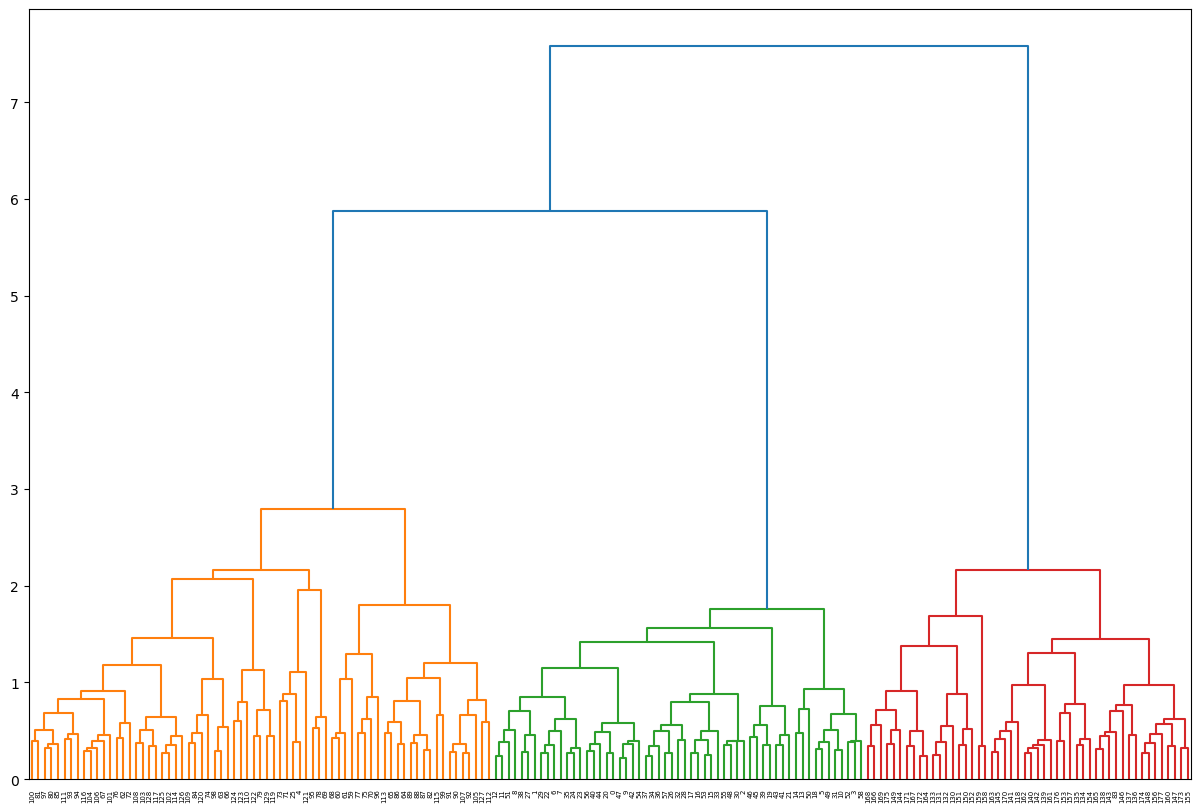

In [56]:
linked = linkage(xdist, 'ward')

plt.figure(figsize=(15,10))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()